In [1]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [2]:
df = pd.read_csv('campeonato brasileiro\campeonato-brasileiro-full.csv') # Lê o arquivo csv
print(df.shape)
df.head() # Mostra as 5 primeiras linhas do dataframe

(8025, 16)


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


In [4]:
gamesDf = df.loc[:, ['rodata','mandante', 'mandante_Placar', 'visitante', 'visitante_Placar', 'vencedor', 'data', 'hora']]
print(gamesDf.shape)
gamesDf.head()

(8025, 8)


,rodata,mandante,mandante_Placar,visitante,visitante_Placar,vencedor,data,hora
0,1,Guarani,4,Vasco,2,Guarani,29/3/2003,16:00
1,1,Athletico-PR,2,Gremio,0,Athletico-PR,29/3/2003,16:00
2,1,Flamengo,1,Coritiba,1,-,30/3/2003,16:00
3,1,Goias,2,Paysandu,2,-,30/3/2003,16:00
4,1,Internacional,1,Ponte Preta,1,-,30/3/2003,16:00


In [5]:
gamesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rodata            8025 non-null   int64 
 1   mandante          8025 non-null   object
 2   mandante_Placar   8025 non-null   int64 
 3   visitante         8025 non-null   object
 4   visitante_Placar  8025 non-null   int64 
 5   vencedor          8025 non-null   object
 6   data              8025 non-null   object
 7   hora              8025 non-null   object
dtypes: int64(3), object(5)
memory usage: 501.7+ KB


In [6]:
gamesDf.describe()

,rodata,mandante_Placar,visitante_Placar
count,8025.000000,8025.000000,8025.000000
mean,20.163240,1.547040,1.024922
std,11.465955,1.232277,1.024076
min,1.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000
50%,20.000000,1.000000,1.000000
75%,30.000000,2.000000,2.000000
max,46.000000,7.000000,7.000000


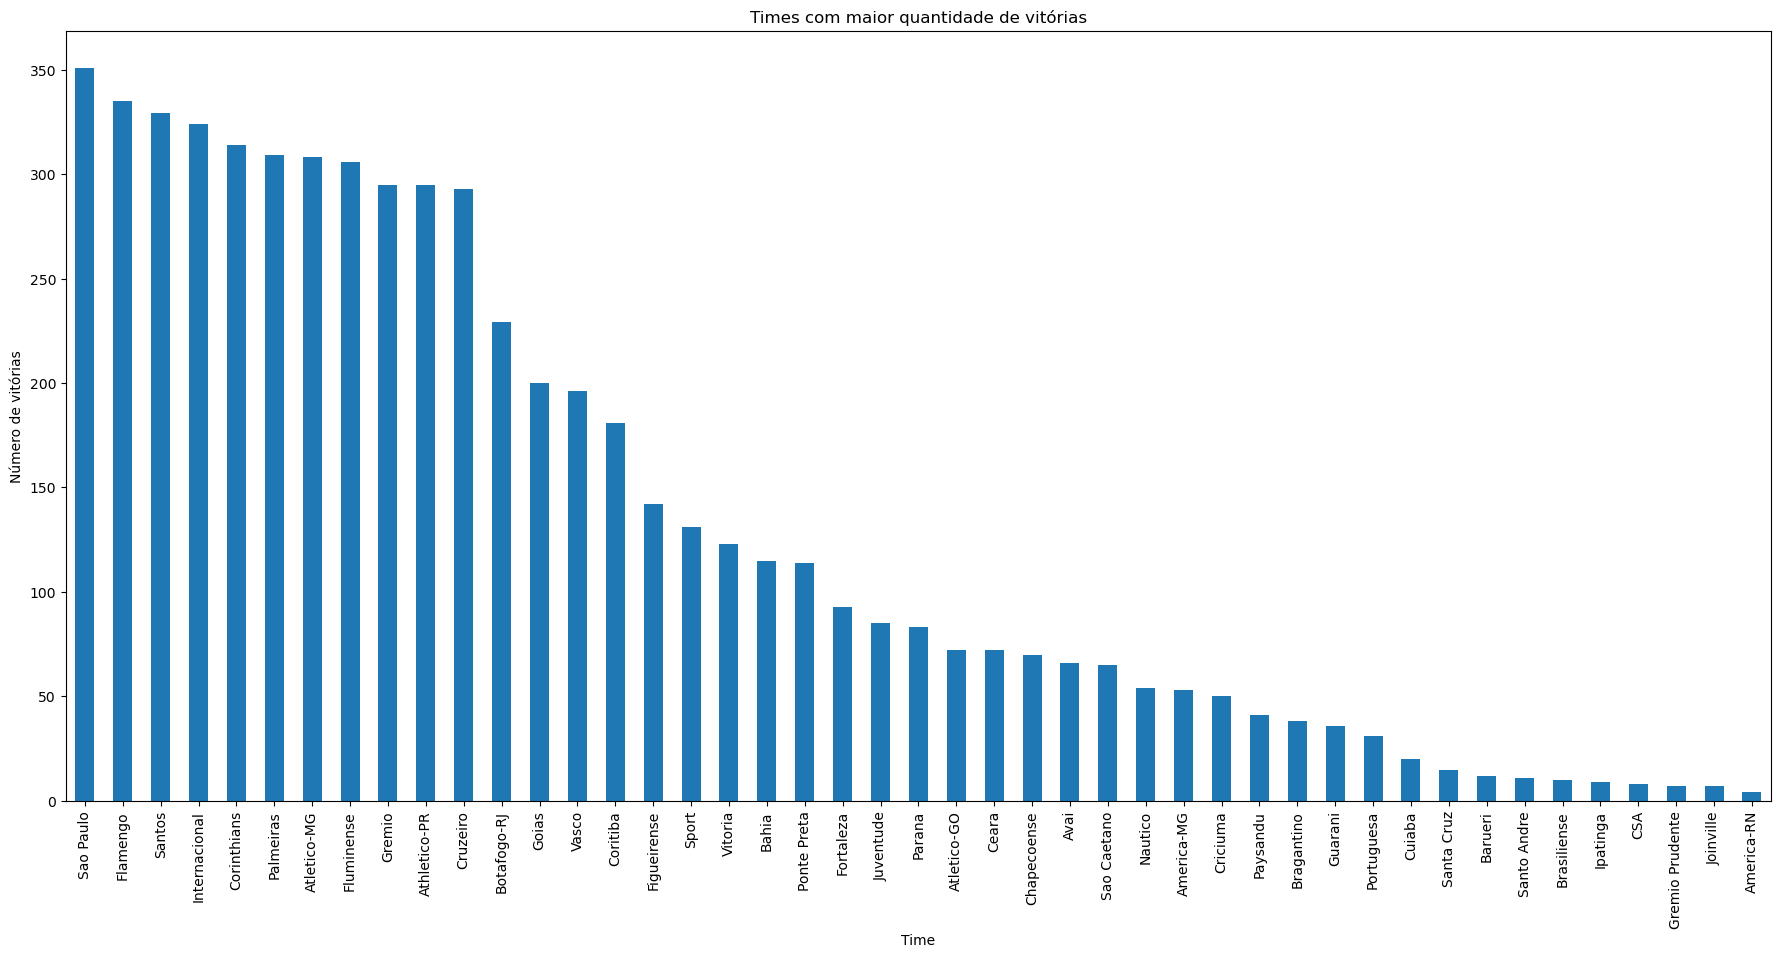

In [7]:
plt.figure(figsize=(22, 10))
winnersDf = gamesDf[gamesDf['vencedor'] != '-']
winner_counts = winnersDf['vencedor'].value_counts()
winner_counts.plot(kind='bar')
plt.title('Times com maior quantidade de vitórias')
plt.xlabel('Time')
plt.ylabel('Número de vitórias')
plt.show()


In [8]:
allGames = pd.DataFrame(columns=[
    'time', 
    'games_total', 'points_total', 'wins_total', 'draws_total', 'losses_total', 'gm_total', 'gs_total', 
    'games_home', 'points_home', 'wins_home', 'draws_home', 'losses_home', 'gm_home', 'gs_home', 
    'games_away', 'points_away', 'wins_away', 'draws_away', 'losses_away', 'gm_away', 'gs_away', 
])

totalGames = pd.DataFrame(columns=[
    'time', 
    'games_total', 'points_total', 'wins_total', 'draws_total', 'losses_total', 'gm_total', 'gs_total', 
])

homeGames = pd.DataFrame(columns=[
    'time', 
    'games_home', 'points_home', 'wins_home', 'draws_home', 'losses_home', 'gm_home', 'gs_home', 
])

awayGames = pd.DataFrame(columns=[
    'time', 
    'games_away', 'points_away', 'wins_away', 'draws_away', 'losses_away', 'gm_away', 'gs_away', 
])

for time in gamesDf['mandante'].unique():
    dfTime = gamesDf.loc[(gamesDf['mandante'] == time) | (gamesDf['visitante'] == time)]
    dfHome = gamesDf.loc[(gamesDf['mandante'] == time)]
    dfAway = gamesDf.loc[(gamesDf['visitante'] == time)]
    
    games_total = len(dfTime)
    games_home = len(dfHome)
    games_away = len(dfAway)

    gm_home = dfHome['mandante_Placar'].sum()
    gm_away = dfAway['visitante_Placar'].sum()
    gm_total = gm_home + gm_away
    
    gs_home = dfHome['visitante_Placar'].sum()
    gs_away = dfAway['mandante_Placar'].sum()
    gs_total = gs_home + gs_away

    wins_total = len(dfTime[dfTime['vencedor'] == time])
    wins_home = len(dfHome[dfHome['vencedor'] == time])
    wins_away = len(dfAway[dfAway['vencedor'] == time])

    draws_total = len(dfTime[dfTime['vencedor'] == '-'])
    draws_home = len(dfHome[dfHome['vencedor'] == '-'])
    draws_away = len(dfAway[dfAway['vencedor'] == '-'])
    
    losses_total = len(dfTime[dfTime['vencedor']!= time]) - draws_total
    losses_home = len(dfHome[dfHome['vencedor']!= time]) - draws_home
    losses_away = len(dfAway[dfAway['vencedor']!= time]) - draws_away

    points_total = (wins_total * 3) + draws_total
    points_home = (wins_home * 3) + draws_home
    points_away = (wins_away * 3) + draws_away
    
    allGames.loc[len(allGames)]= {
        'time': time, 
        'games_total': games_total, 'points_total': points_total, 'wins_total': wins_total, 'draws_total': draws_total, 'losses_total': losses_total, 'gm_total': gm_total, 'gs_total': gs_total, 
        'games_home': games_home, 'points_home': points_home, 'wins_home': wins_home, 'draws_home': draws_home, 'losses_home': losses_home, 'gm_home': gm_home, 'gs_home': gs_home, 
        'games_away': games_away, 'points_away': points_away, 'wins_away': wins_away, 'draws_away': draws_away, 'losses_away': losses_away, 'gm_away': gm_away, 'gs_away': gs_away, 
    }
    
    totalGames.loc[len(totalGames)]= {
        'time': time, 
        'games_total': games_total, 'points_total': points_total, 'wins_total': wins_total, 'draws_total': draws_total, 'losses_total': losses_total, 'gm_total': gm_total, 'gs_total': gs_total, 
    }

    homeGames.loc[len(homeGames)]= {
        'time': time, 
        'games_home': games_home, 'points_home': points_home, 'wins_home': wins_home, 'draws_home': draws_home, 'losses_home': losses_home, 'gm_home': gm_home, 'gs_home': gs_home, 
    }
    
    awayGames.loc[len(awayGames)]= {
        'time': time, 
        'games_away': games_away, 'points_away': points_away, 'wins_away': wins_away, 'draws_away': draws_away, 'losses_away': losses_away, 'gm_away': gm_away, 'gs_away': gs_away, 
    }

print(allGames.shape)
totalGames.head()

(45, 22)


,time,games_total,points_total,wins_total,draws_total,losses_total,gm_total,gs_total
0,Guarani,130,147,36,39,55,140,180
1,Athletico-PR,742,1060,295,175,272,981,922
2,Flamengo,780,1217,335,212,233,1113,920
3,Goias,552,731,200,131,221,753,786
4,Internacional,742,1164,324,192,226,995,807


In [9]:
totalGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          45 non-null     object
 1   games_total   45 non-null     int64 
 2   points_total  45 non-null     int64 
 3   wins_total    45 non-null     int64 
 4   draws_total   45 non-null     int64 
 5   losses_total  45 non-null     int64 
 6   gm_total      45 non-null     int64 
 7   gs_total      45 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.2+ KB


In [10]:
totalGames.describe()

,games_total,points_total,wins_total,draws_total,losses_total,gm_total,gs_total
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,356.666667,487.822222,131.155556,94.355556,131.155556,458.666667,458.666667
std,271.387261,426.699718,118.781686,71.954580,85.204288,386.348759,317.610968
min,38.000000,17.000000,4.000000,5.000000,13.000000,24.000000,48.000000
25%,114.000000,147.000000,36.000000,38.000000,47.000000,140.000000,157.000000
50%,266.000000,308.000000,83.000000,77.000000,118.000000,312.000000,377.000000
75%,658.000000,867.000000,229.000000,175.000000,217.000000,818.000000,786.000000
max,780.000000,1271.000000,351.000000,218.000000,272.000000,1139.000000,985.000000


In [11]:
totalGames.sort_values(by=['points_total'], ascending=False, inplace=True)
totalGames.head()

,time,games_total,points_total,wins_total,draws_total,losses_total,gm_total,gs_total
22,Sao Paulo,780,1271,351,218,211,1123,841
2,Flamengo,780,1217,335,212,233,1113,920
10,Santos,780,1194,329,207,244,1139,918
4,Internacional,742,1164,324,192,226,995,807
11,Corinthians,742,1157,314,215,213,952,784


c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


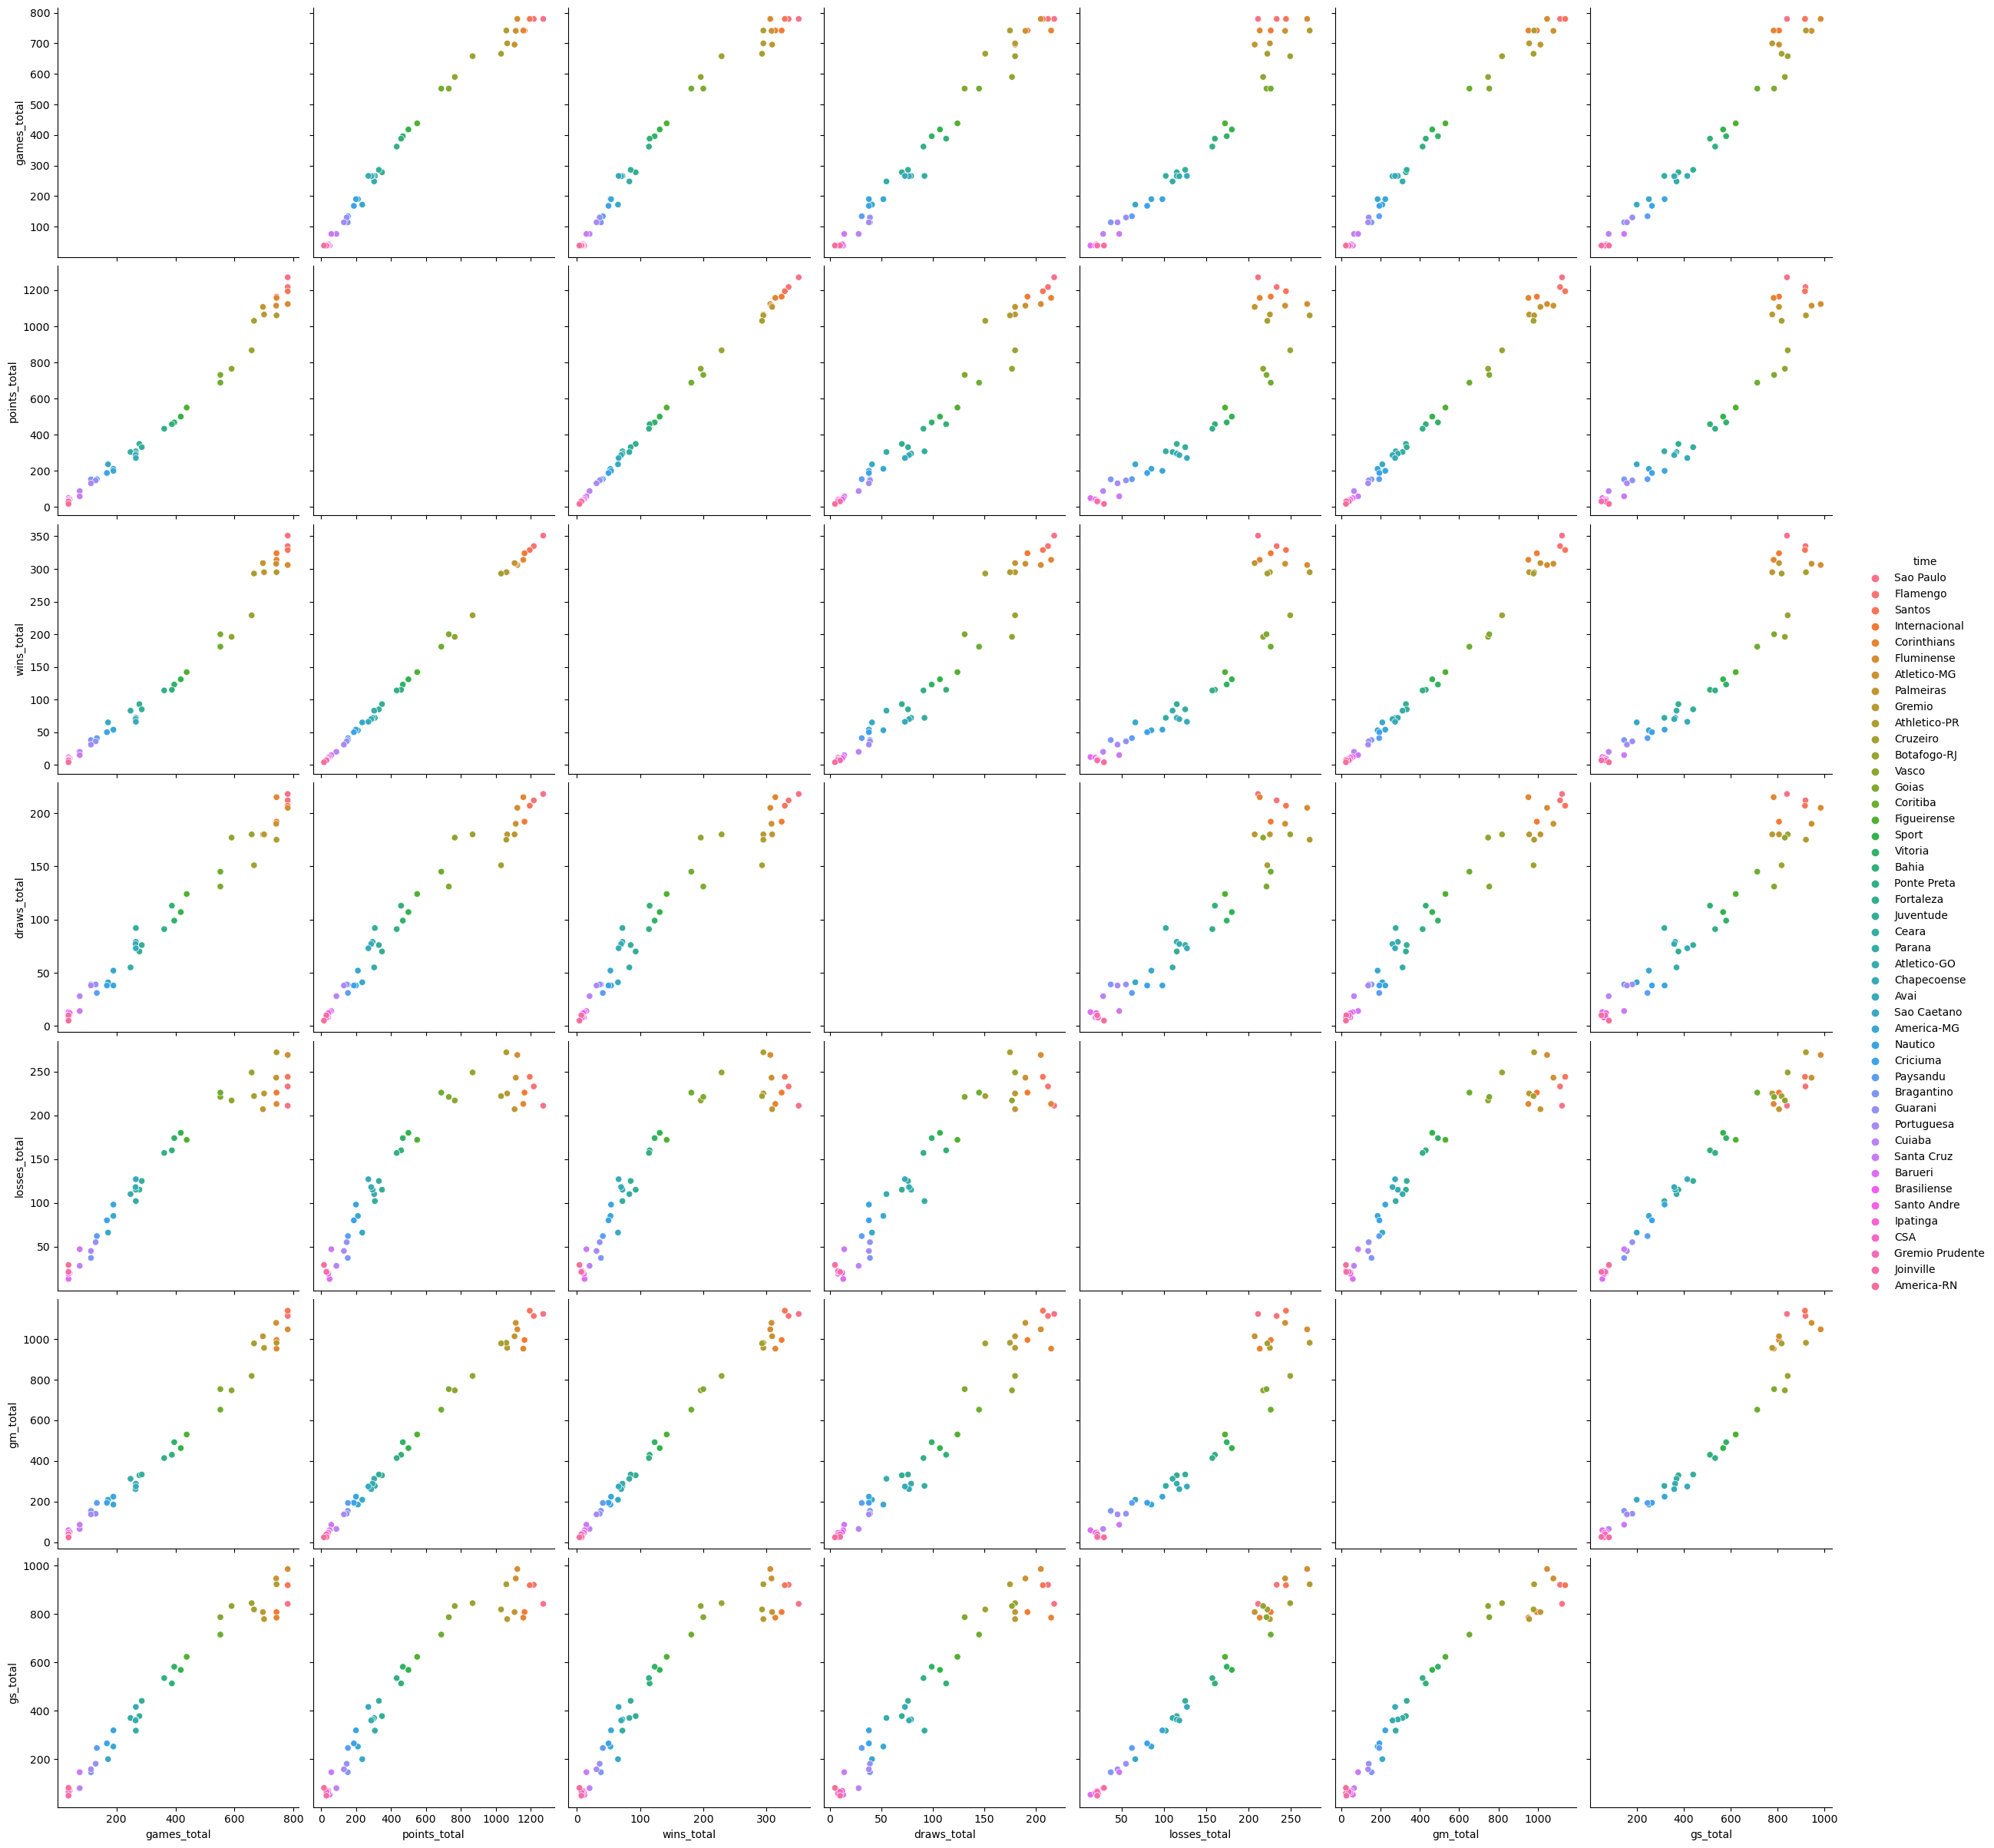

In [12]:
sns.pairplot(totalGames, hue='time', height=3.5);



Matriz de correlação: 


,games_total,points_total,wins_total,draws_total,losses_total,gm_total,gs_total
games_total,1.000000,0.990963,0.986427,0.991394,0.972749,0.992790,0.986466
points_total,0.990963,1.000000,0.999251,0.981473,0.934467,0.996655,0.959925
wins_total,0.986427,0.999251,1.000000,0.973325,0.925856,0.995724,0.953056
draws_total,0.991394,0.981473,0.973325,1.000000,0.956337,0.979106,0.972600
losses_total,0.972749,0.934467,0.925856,0.956337,1.000000,0.947202,0.992035
gm_total,0.992790,0.996655,0.995724,0.979106,0.947202,1.000000,0.972710
gs_total,0.986466,0.959925,0.953056,0.972600,0.992035,0.972710,1.000000


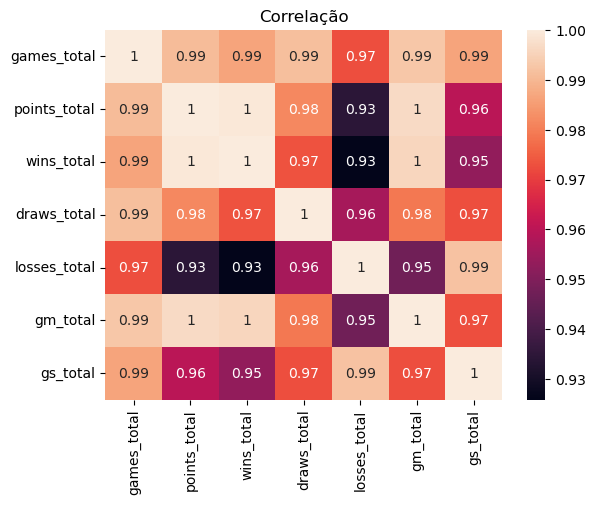

In [14]:
df_correlation = totalGames.loc[:,['games_total', 'points_total', 'wins_total', 'draws_total', 'losses_total', 'gm_total', 'gs_total']].corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


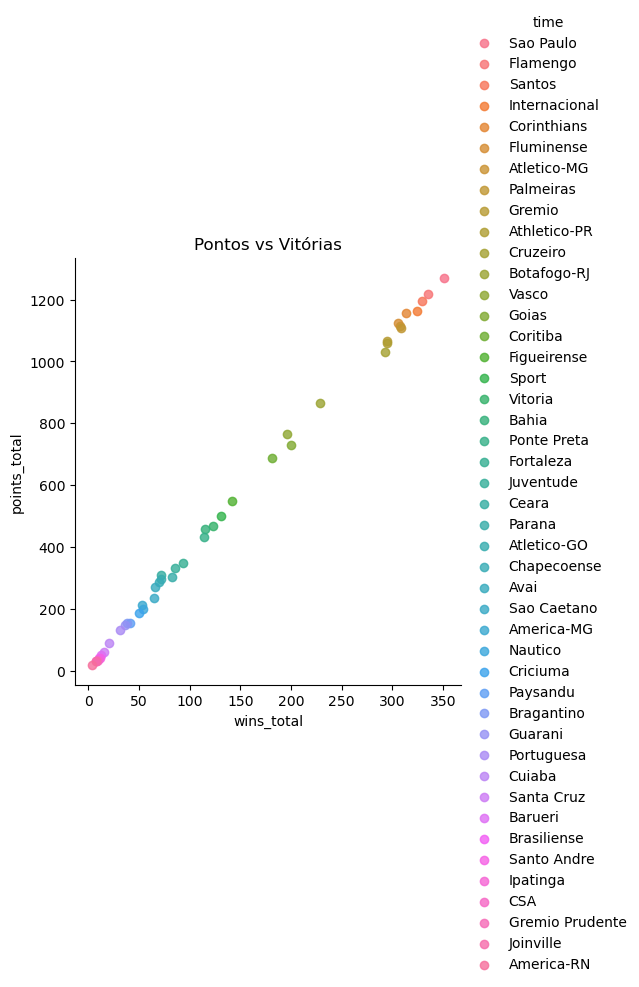

In [15]:
sns.lmplot(x='wins_total', y='points_total', data=totalGames,
           fit_reg=False,
           hue='time')

plt.title('Pontos vs Vitórias')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


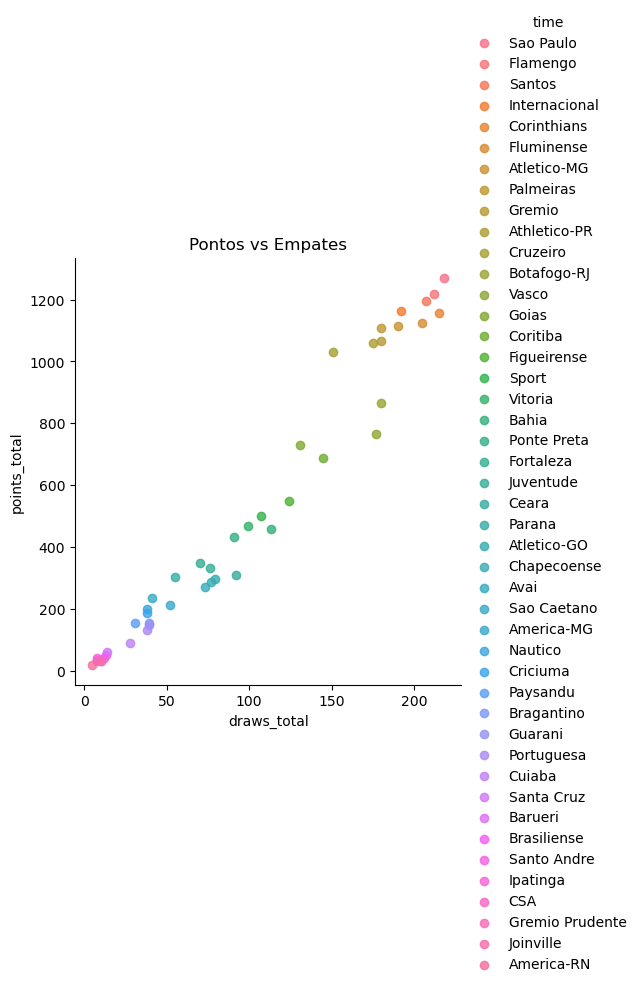

In [16]:
sns.lmplot(x='draws_total', y='points_total', data=totalGames,
           fit_reg=False,
           hue='time')

plt.title('Pontos vs Empates')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


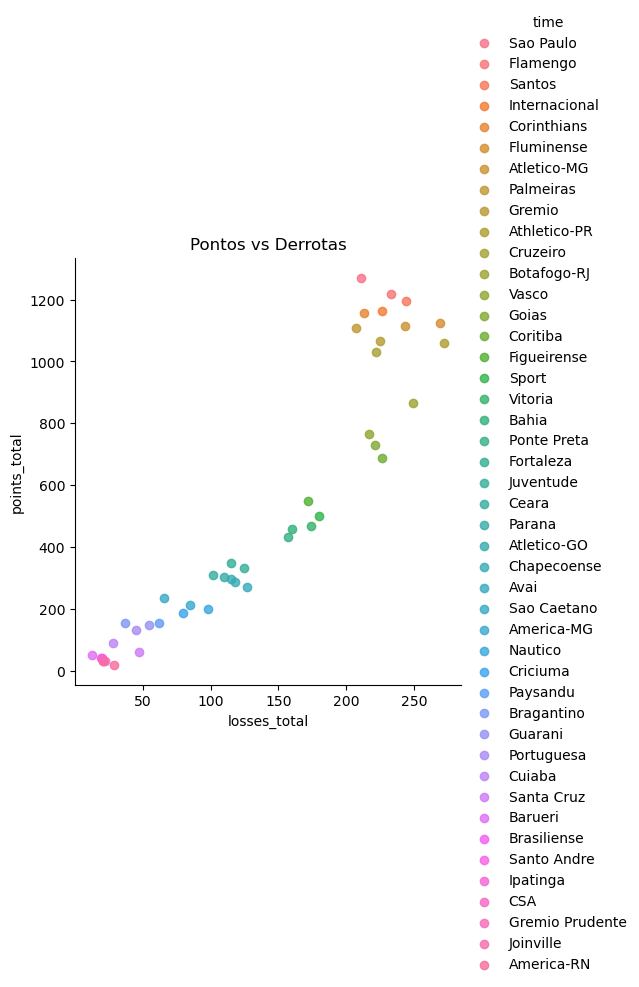

In [17]:
sns.lmplot(x='losses_total', y='points_total', data=totalGames,
           fit_reg=False,
           hue='time')

plt.title('Pontos vs Derrotas')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


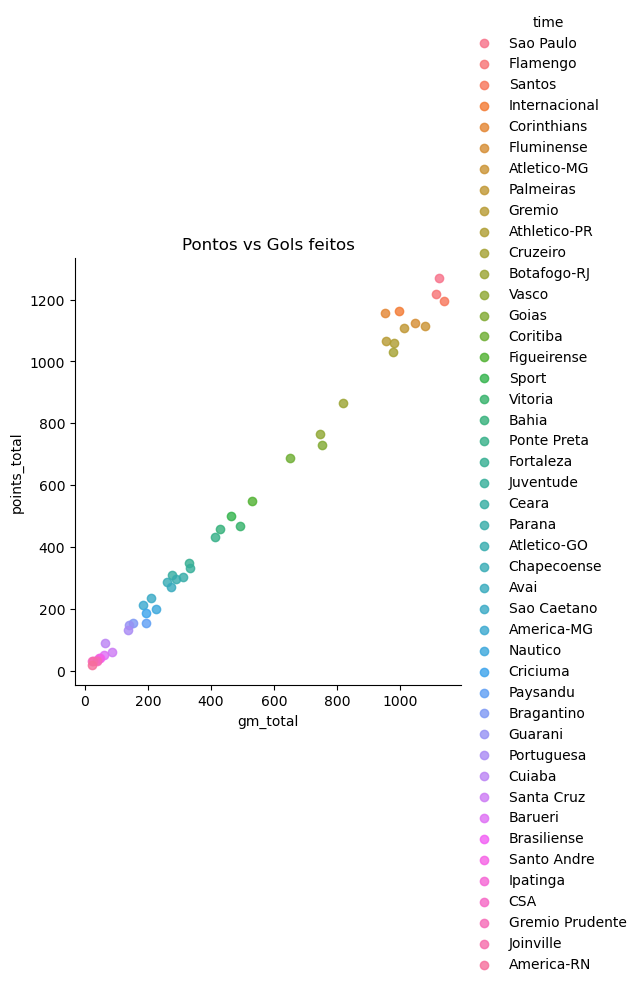

In [18]:
sns.lmplot(x='gm_total', y='points_total', data=totalGames,
           fit_reg=False,
           hue='time')

plt.title('Pontos vs Gols feitos')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


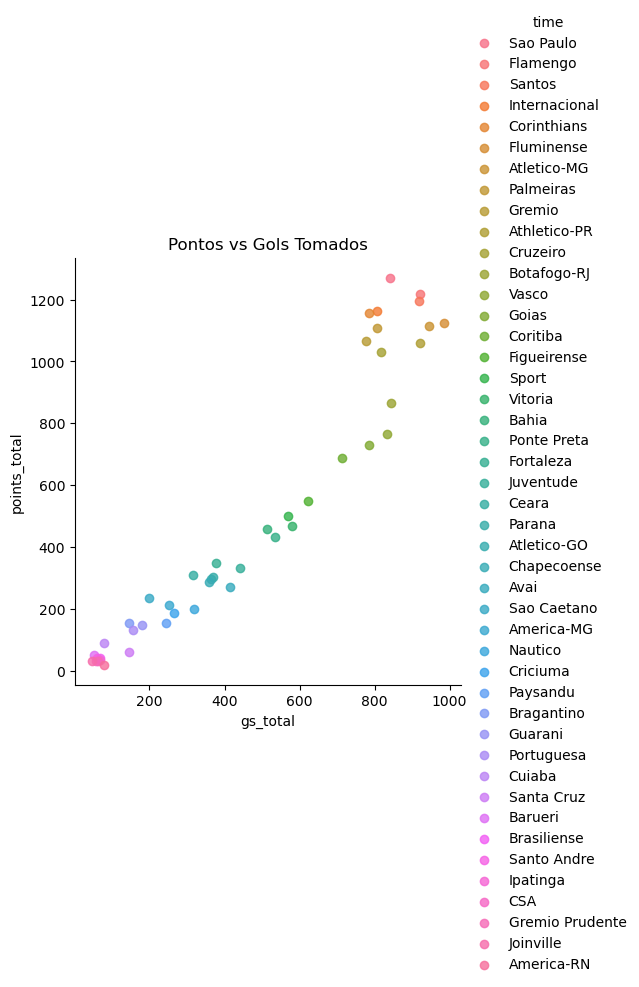

In [19]:
sns.lmplot(x='gs_total', y='points_total', data=totalGames,
           fit_reg=False,
           hue='time')

plt.title('Pontos vs Gols Tomados')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


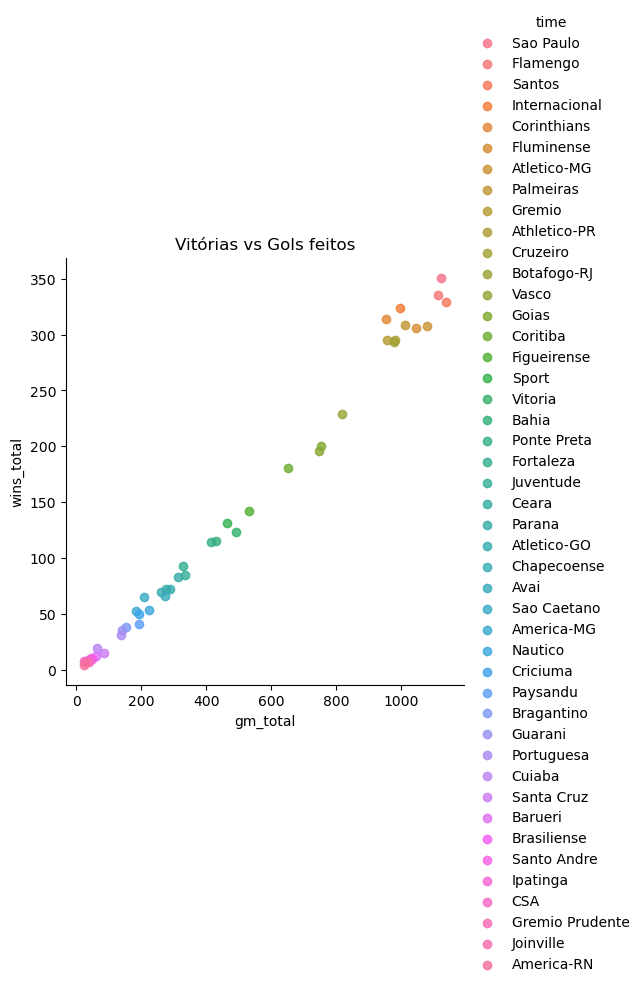

In [20]:
sns.lmplot(x='gm_total', y='wins_total', data=totalGames,
           fit_reg=False,
           hue='time')

plt.title('Vitórias vs Gols feitos')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


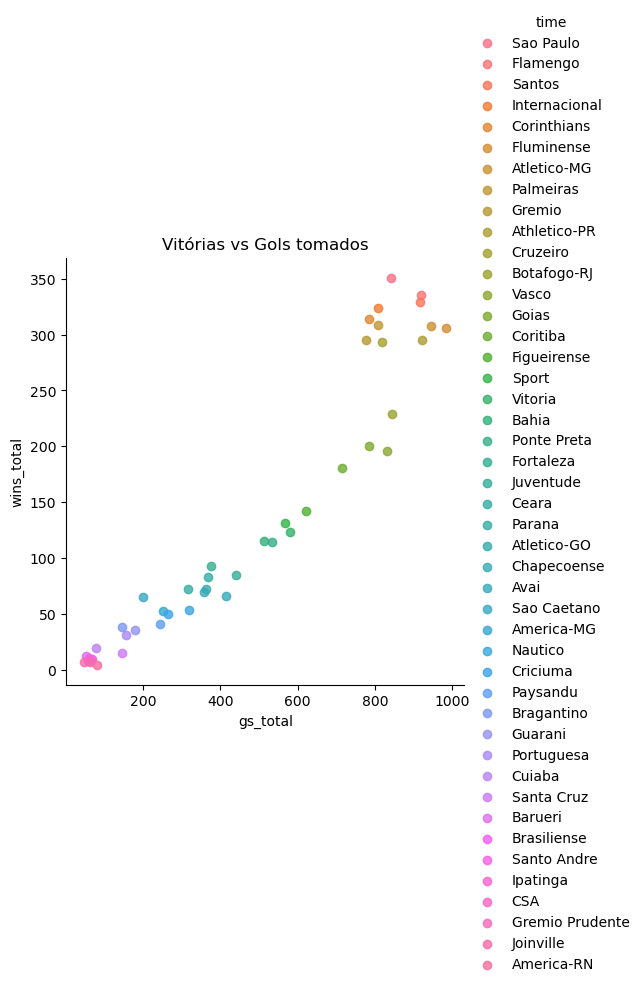

In [21]:
sns.lmplot(x='gs_total', y='wins_total', data=totalGames,
           fit_reg=False,
           hue='time')

plt.title('Vitórias vs Gols tomados')

# mostra o gráfico
plt.show()